In [1]:
#Importing Necessary Libraries:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:

#Data Acquisition and loading the dataset


In [6]:
#Loading Dataset
df = pd.read_csv("powerconsumption.csv")

#displaying the dataframe
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [7]:
#displaying the first five rows of the dataframe using head() function
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


#How did I get access to the dataset?

ans: The dataset for Power Consumption is likely provided as a download to you in a CSV format from kaggle.

#Attributes of dataset:

#Features:

Datetime

-Temperature

-Humidity

-WindSpeed

-GeneralDiffuseFlows

-DiffuseFlows

-PowerConsumption_Zone1

-PowerConsumption_Zone2

#Target:

-PowerConsumption_Zone3



In [8]:
#Objective of the Dataset


The Power Consumption Dataset helps us understand and analyze how electricity is used in different situations. It looks at factors like the time of day, weather, appliance usage, and seasons to track and predict energy consumption. By studying these patterns, we can find ways to use energy more efficiently, reduce waste, and improve how energy is distributed. The data also supports smart grid systems, predicting energy demand, and creating sustainable solutions to reduce the environmental impact of overusing energy.

In [9]:
#finding out the total number of elements in the entire Dataframe.
print("The total number of elements in the dataset is: ", df.size)

The total number of elements in the dataset is:  471744


In [10]:
#acquiring the details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [11]:
# our CSV file path
file_path = "powerconsumption.csv"

# Loading the dataframe
df = pd.read_csv(file_path)

# Calculate variance only for numeric columns
numeric_df = df.select_dtypes(include=np.number) # Now np is defined
variance = numeric_df.var()

# Print the variance
print(variance)

Temperature               3.381976e+01
Humidity                  2.418391e+02
WindSpeed                 5.517152e+00
GeneralDiffuseFlows       6.990787e+04
DiffuseFlows              1.542836e+04
PowerConsumption_Zone1    5.084492e+07
PowerConsumption_Zone2    2.705525e+07
PowerConsumption_Zone3    4.385307e+07
dtype: float64


In [12]:
col = df.columns.to_list() #extracting column names and storing them in the 'col' list.
col

['Datetime',
 'Temperature',
 'Humidity',
 'WindSpeed',
 'GeneralDiffuseFlows',
 'DiffuseFlows',
 'PowerConsumption_Zone1',
 'PowerConsumption_Zone2',
 'PowerConsumption_Zone3']

In [13]:
#Data Cleaning

Checking for missing values and duplicate rows.

In [14]:
#using isnull() to find the null values in each column of the dataframe.
#using the sum function to get the count of null values in each column.
df.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [15]:
#using the duplicated() to check for duplicate rows in the dataframe
print("Number of duplicate rows: ", df.duplicated().sum())

Number of duplicate rows:  0


In [16]:
df.shape #getting the dimensions (number of rows and columns)

(52416, 9)

In [17]:
#Summary Statistics.

In [19]:
#Data Visualization.


In [20]:
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


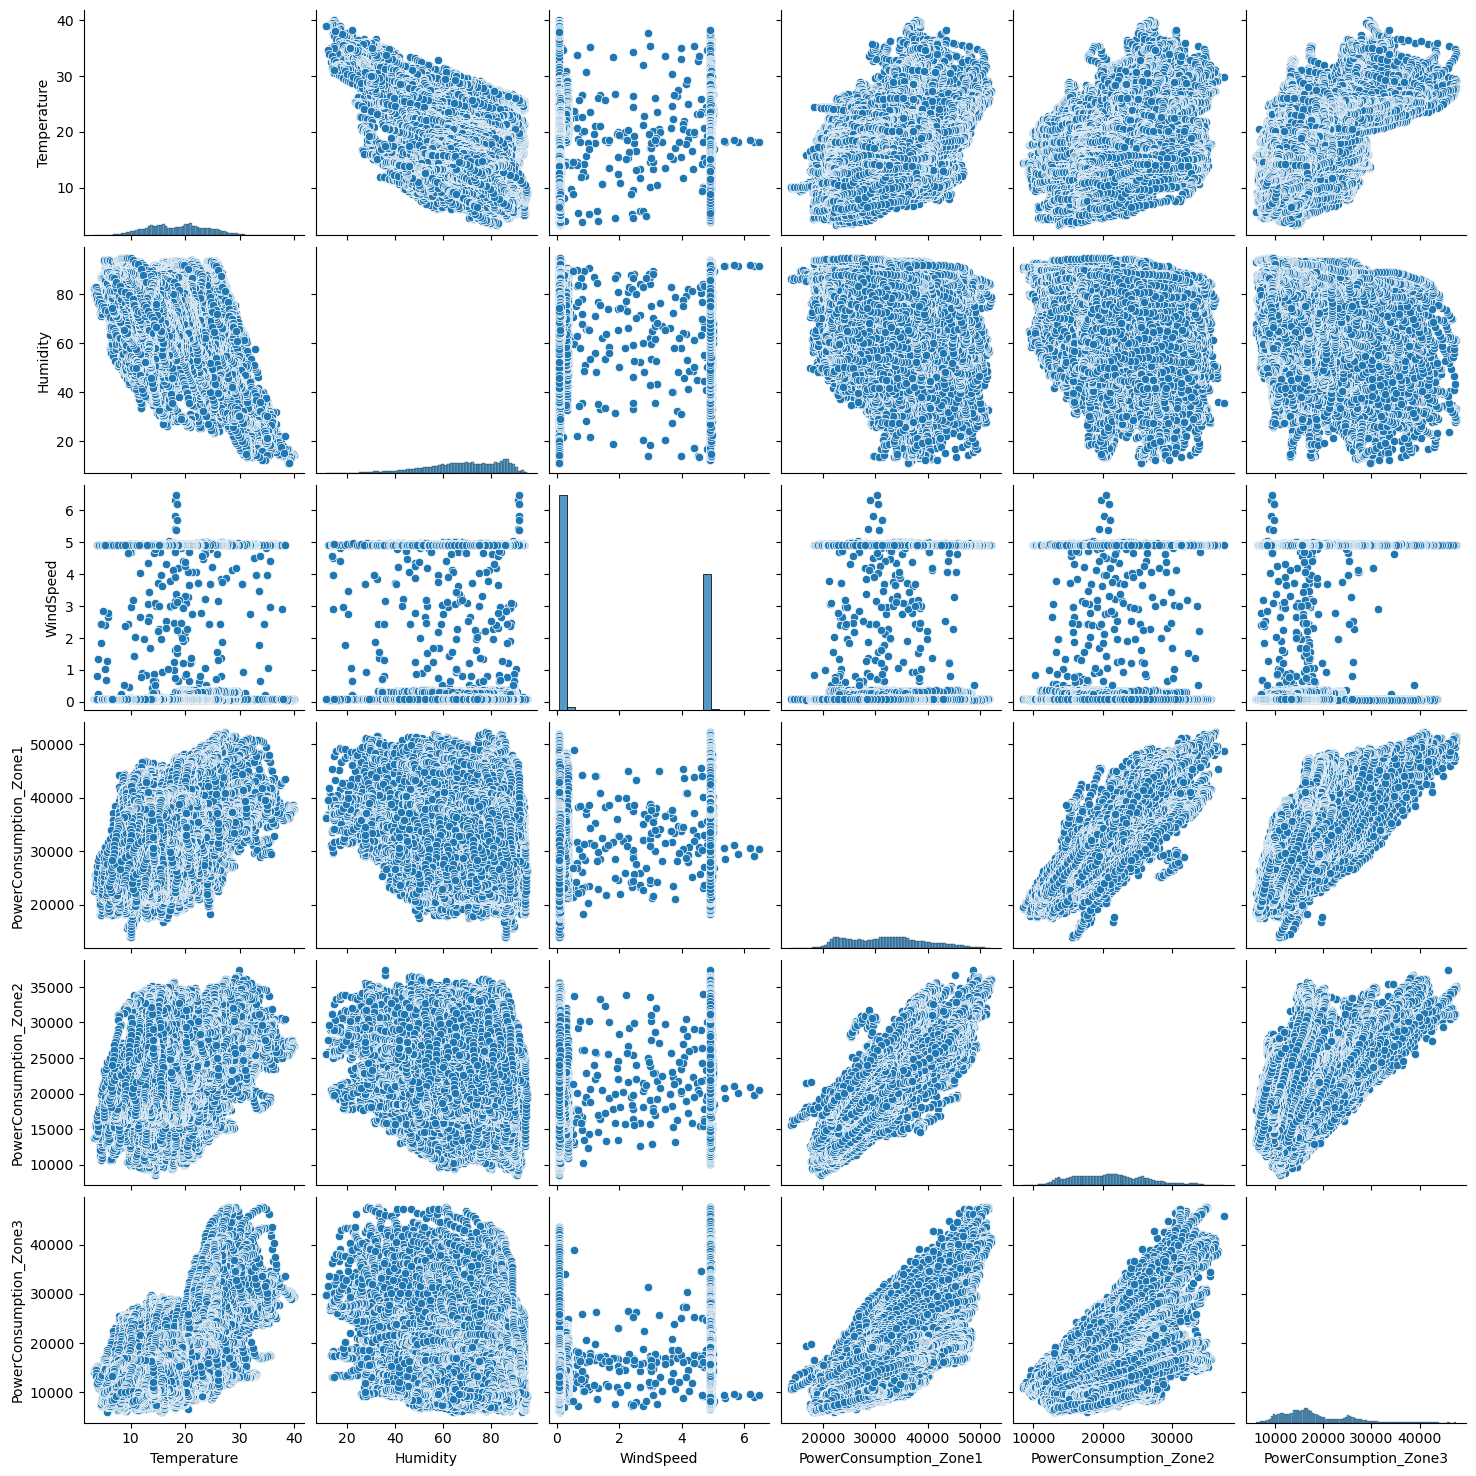

In [21]:
# Pairplot to visualize relationships between numerical columns
sns.pairplot(df[['Temperature', 'Humidity', 'WindSpeed', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']])
plt.show()

In [22]:
#Histogram


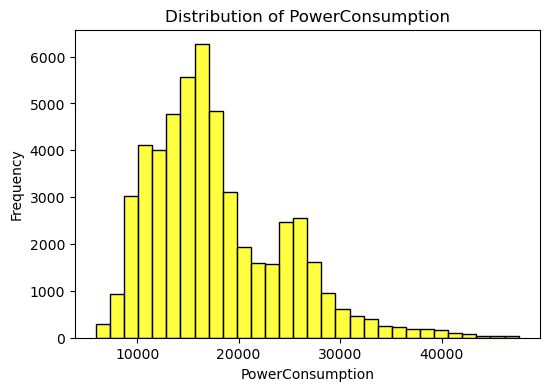

In [23]:
PowerConsumption_Zone3_df = df['PowerConsumption_Zone3'] #extracting the 'PowerConsumption_Zone3' column for univariate analysis

#creating a histogram for the distribution of PowerConsumption
#Univariate Analysis, Bar Plot
plt.figure(figsize = (6, 4))
sns.histplot(PowerConsumption_Zone3_df, bins=30, kde = False, color = 'yellow')
plt.title('Distribution of PowerConsumption')
plt.xlabel('PowerConsumption')
plt.ylabel('Frequency')
plt.show()

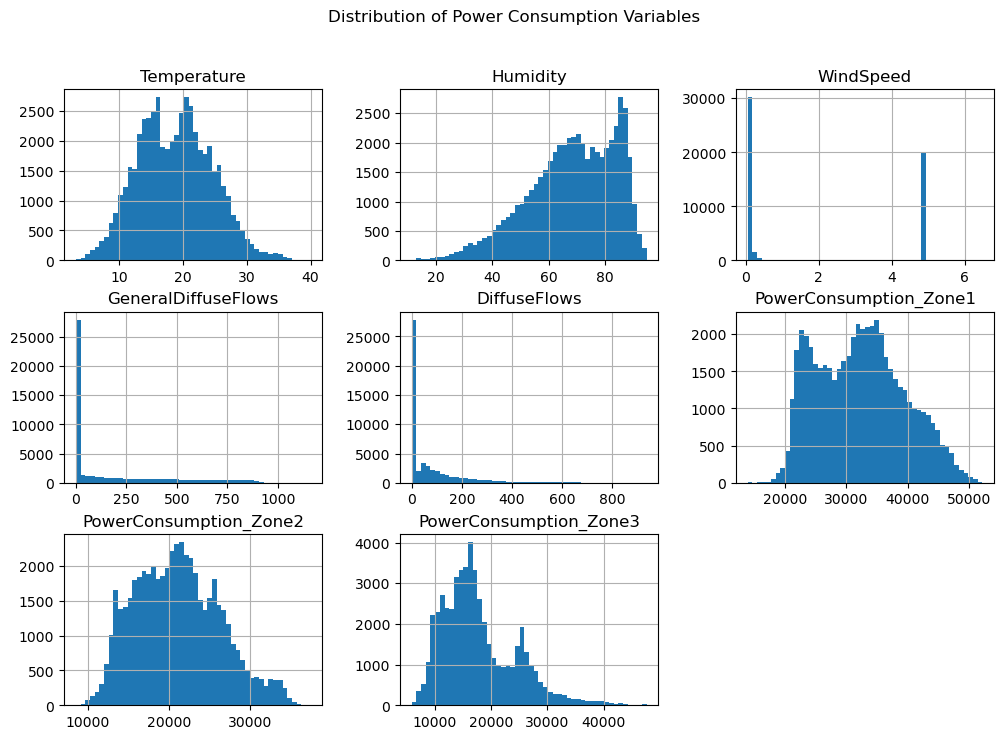

In [24]:
#Histograms for data distributions
df.hist(figsize=(12, 8), bins=50)
plt.suptitle("Distribution of Power Consumption Variables")
plt.show()


In [50]:
#correlation

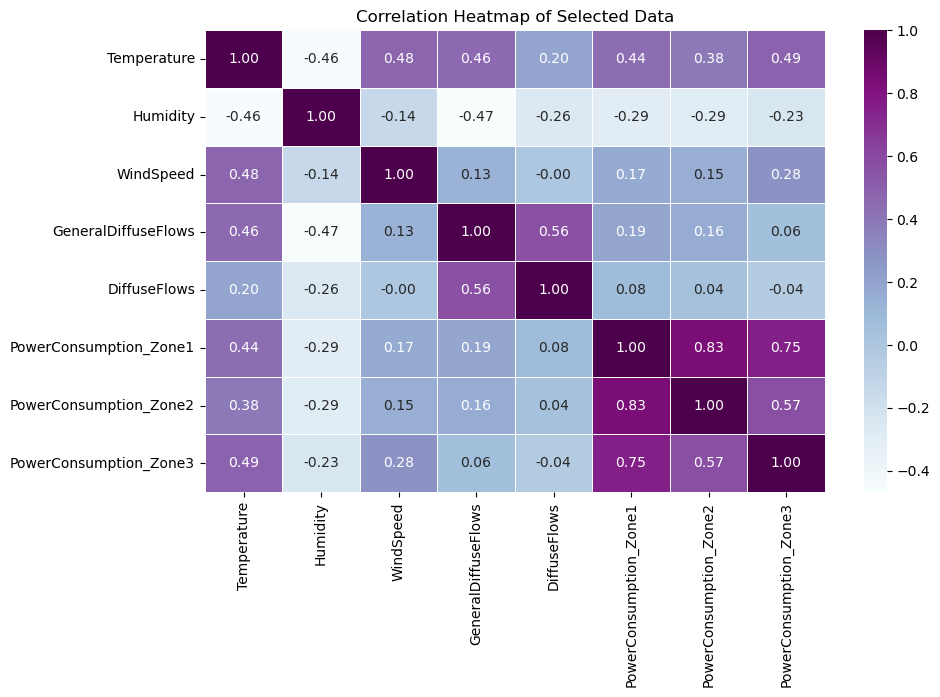

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is our DataFrame containing the required columns
# Convert 'Datetime' column to datetime objects
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extracting the numeric features for correlation analysis
numeric_features = ['Temperature', 'Humidity', 'WindSpeed',
                    'GeneralDiffuseFlows', 'DiffuseFlows',
                    'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
                    'PowerConsumption_Zone3']

# Calculating the correlation matrix for the numeric features
cormat = df[numeric_features].corr()

# Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cormat, cmap='BuPu', annot=True, fmt='.2f', linewidths=0.4)
plt.title("Correlation Heatmap of Selected Data")
plt.show()

The following correlation heatmap was developed to understand the relationship between the different variables at play in the dataset, focusing on the power consumption in Zone 3 and other elements. First, date-time objects are created from the 'Datetime' column of the data frame to make sure that time-based data are correctly handled. A correlation analysis follows for these features: Temperature, Humidity, WindSpeed, GeneralDiffuseFlows, DiffuseFlows, and PowerConsumption_Zone3. This heatmap was created using seaborn, displaying the 'Blues' color palette for showing the correlation between these variables. The annotations in the heatmap show the exact value of the correlation coefficients so that one can assess the strength and direction of the relationships. This analysis provides us insight into how variables such as temperature, humidity, wind speed, power consumption zone 1, power consumption zone 2, and diffuse flows are related to power consumption in Zone 3. It could be that the power consumption is positively correlated with environmental factors like temperature and wind speed. Such would provide a meaning as to how those environmental factors drive energy usage in that zone.

In [55]:
#Boxplot

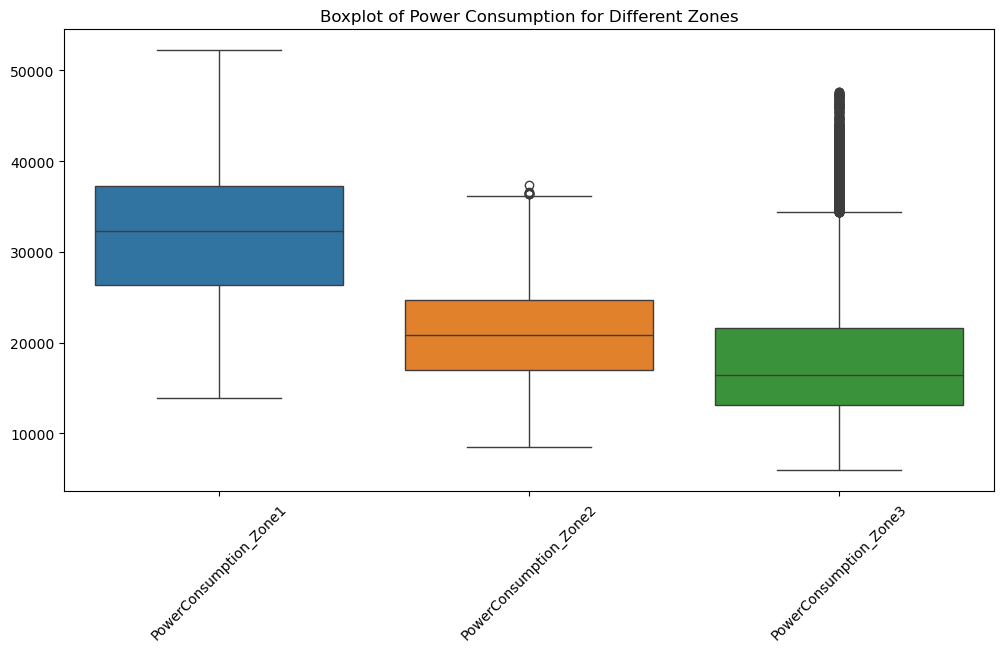

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]])
plt.xticks(rotation=45)
plt.title("Boxplot of Power Consumption for Different Zones")
plt.show()


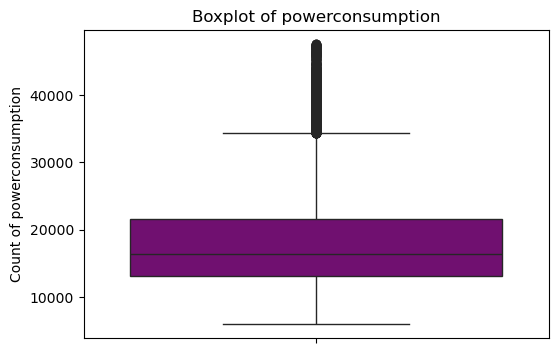

In [59]:
#Univariate Analysis, Box plot
plt.figure(figsize=(6, 4))
sns.boxplot(y=PowerConsumption_Zone3_df, color = "purple")
plt.title("Boxplot of powerconsumption")
plt.ylabel("Count of powerconsumption")
plt.show()

In [61]:
#Time Series Plot

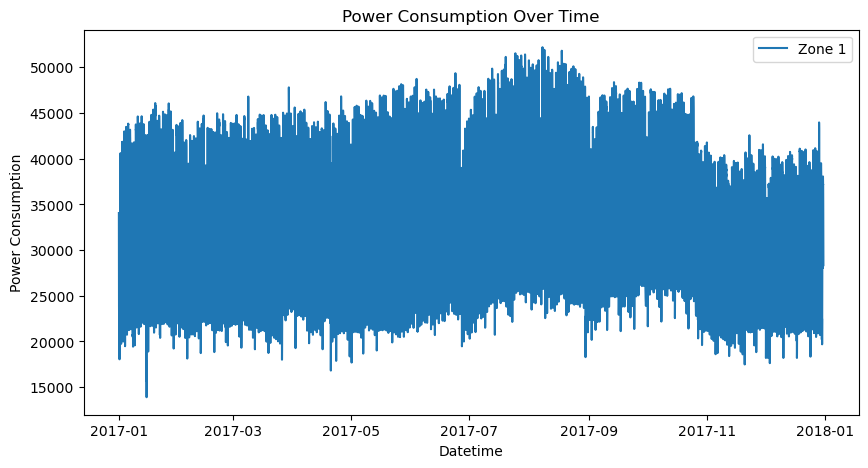

In [63]:
# Time series plot for PowerConsumption
plt.figure(figsize=(10, 5))
sns.lineplot(x='Datetime', y='PowerConsumption_Zone1', data=df, label='Zone 1')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Over Time')
plt.show()

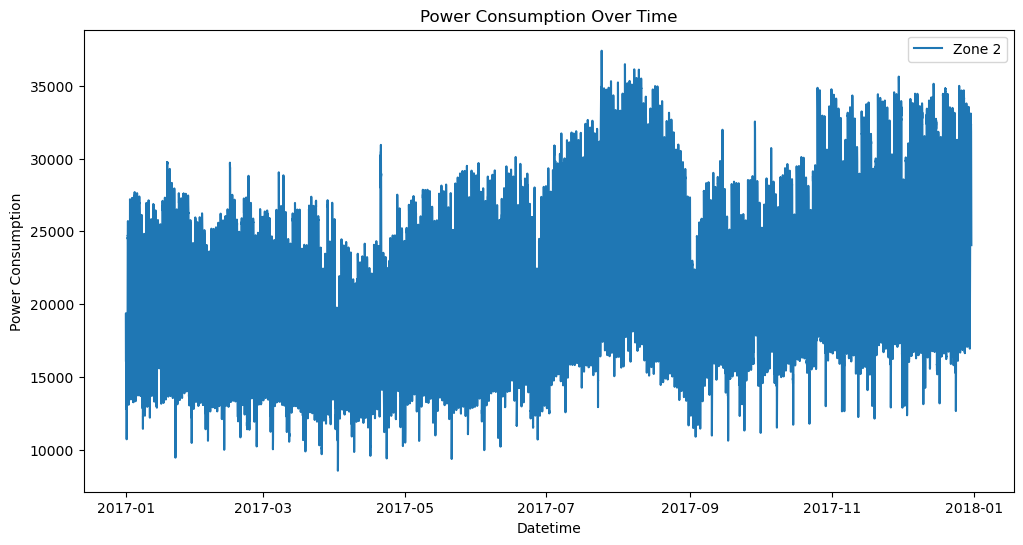

In [65]:
# Time series plot for PowerConsumption
plt.figure(figsize=(12, 6))
sns.lineplot(x='Datetime', y='PowerConsumption_Zone2', data=df, label='Zone 2')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Over Time')
plt.show()

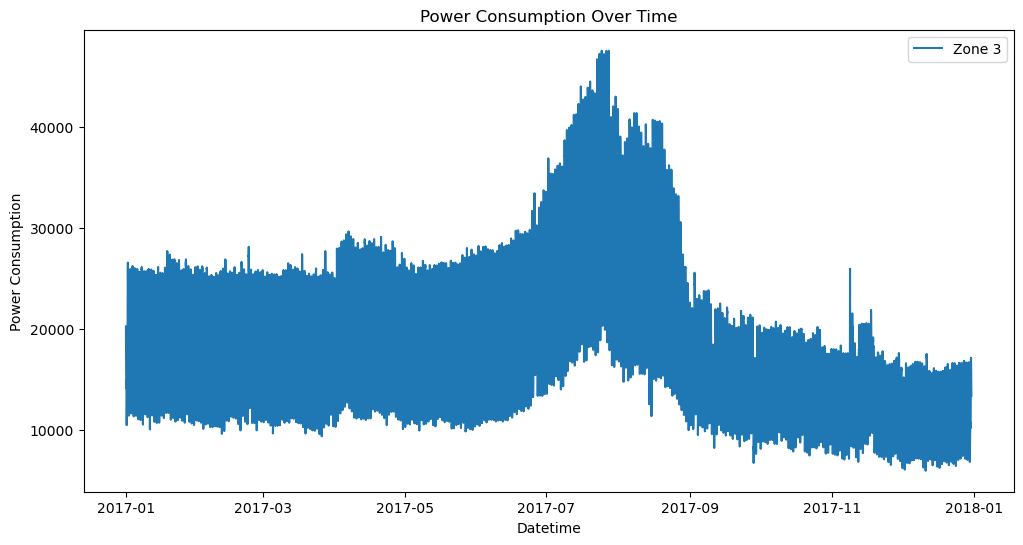

In [67]:
# Time series plot for PowerConsumption
plt.figure(figsize=(12, 6))
sns.lineplot(x='Datetime', y='PowerConsumption_Zone3', data=df, label='Zone 3')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Over Time')
plt.show()

In [69]:
#feature Engineering

In [71]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['day'] = df.index.month
    df['year'] = df.index.year
    df['season'] = df['month'] % 12 // 3 + 1
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
     # Additional features
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
    df['is_month_start'] = (df['dayofmonth'] == 1).astype(int)
    df['is_month_end'] = (df['dayofmonth'] == df.index.days_in_month).astype(int)
    df['is_quarter_start'] = (df['dayofmonth'] == 1) & (df['month'] % 3 == 1).astype(int)
    df['is_quarter_end'] = (df['dayofmonth'] == df.groupby(['year', 'quarter'])['dayofmonth'].transform('max'))
    
    # Additional features
    df['is_working_day'] = df['dayofweek'].isin([0, 1, 2, 3, 4]).astype(int)
    df['is_business_hours'] = df['hour'].between(9, 17).astype(int)
    df['is_peak_hour'] = df['hour'].isin([8, 12, 18]).astype(int)
    
    # Minute-level features
    df['minute_of_day'] = df['hour'] * 60 + df['minute']
    df['minute_of_week'] = (df['dayofweek'] * 24 * 60) + df['minute_of_day']
    return df.astype(float)


The function above creates new features from the timestamp data in a dataset. It extracts information like the hour, minute, day of the week, month, and year. It also identifies whether the day is a weekend, the start or end of the month or quarter, and whether the time falls within business hours or peak hours. Additionally, it calculates the "minute of the day" and "minute of the week" to capture more detailed time-based patterns. These features help in analyzing time-related trends and improving predictions in time series analysis.

In [73]:
df = df.set_index('Datetime')
df = create_features(df)


In [75]:
df[[ 'year', 'month', 'day','minute', 'dayofyear', 'weekofyear', 'quarter', 'season']].head()


,year,month,day,minute,dayofyear,weekofyear,quarter,season
Datetime,,,,,,,,
2017-01-01 00:00:00,2017.0,1.0,1.0,0.0,1.0,52.0,1.0,1.0
2017-01-01 00:10:00,2017.0,1.0,1.0,10.0,1.0,52.0,1.0,1.0
2017-01-01 00:20:00,2017.0,1.0,1.0,20.0,1.0,52.0,1.0,1.0
2017-01-01 00:30:00,2017.0,1.0,1.0,30.0,1.0,52.0,1.0,1.0
2017-01-01 00:40:00,2017.0,1.0,1.0,40.0,1.0,52.0,1.0,1.0


In [77]:
#Resampling

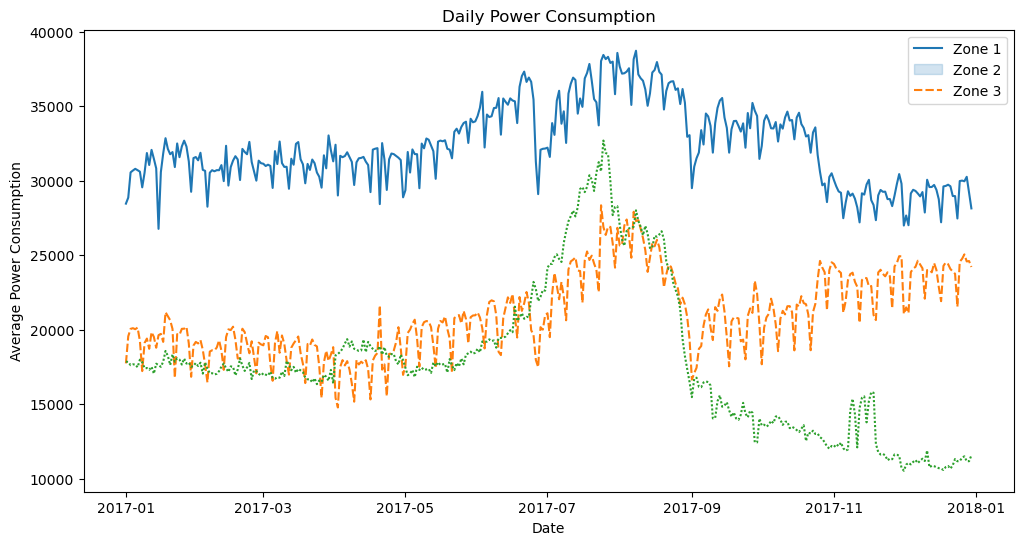

In [79]:
# Resample the data for more meaningful time series analysis (e.g., daily, weekly)
daily_resampled = df.resample('D').mean()

# Plot daily Power Consumption for each zone
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_resampled[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']])
plt.xlabel('Date')
plt.ylabel('Average Power Consumption')
plt.title('Daily Power Consumption')
plt.legend(labels=['Zone 1', 'Zone 2', 'Zone 3'])
plt.show()


The figure above shows the daily powerconsumption of zone1, zone2 and zone 3

In [81]:
#Predictive Analysis

In [91]:
# Check missing values
print("Missing values before processing:\n", df.isna().sum())



Missing values before processing:
 Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64


In [93]:
# Convert to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract useful features
df['hour'] = df['Datetime'].dt.hour
df['day'] = df['Datetime'].dt.day
df['month'] = df['Datetime'].dt.month
df['weekday'] = df['Datetime'].dt.weekday

# Drop the original Datetime column
df.drop(columns=['Datetime'], inplace=True)


In [83]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [85]:
# Loading dataset
df = pd.read_csv("powerconsumption.csv")

# Display basic info
print(df.info())
print(df.head())

# Check for missing values
print("Missing values:\n", df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB
None
        Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  1/1/2017 0:00        6.559      73.8      0.083                0.051   
1  1/1/2017 0:10        6.414      74.5      0.083                0.070   
2  1/1/2017 0:20        6.3

In [1]:
# Lets check data distribution for Regression

In [44]:
# Defining X (features) and y (target variables)
X = df.drop(columns=['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'])
y = df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]


In [50]:
from sklearn.model_selection import train_test_split



# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


Training data: (41932, 26), Testing data: (10484, 26)


In [51]:

# Initializing models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

# Train models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Here, i trained three different models to predict power consumption. The first is Linear Regression, which assumes a straight-line relationship between the features and the target, making it simple and easy to understand. The second is Decision Tree, which splits the data into smaller groups to make predictions, capturing more complex patterns. The last one is Random Forest which uses multiple decision trees to make predictions more accurate and less likely to overfit. These models are chosen to compare different approaches and see which one works best for predicting power consumption.

In [101]:
# Making predictions
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)


In [103]:
# Define evaluation function
def evaluate_model(y_test, y_pred, model_name):
    print(f"📊 Evaluation Metrics for {model_name}:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print("-" * 50)

# Evaluate all models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree Regressor")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


📊 Evaluation Metrics for Linear Regression:
MAE: 3082.7857
MSE: 15301104.1360
R² Score: 0.6161
--------------------------------------------------
📊 Evaluation Metrics for Decision Tree Regressor:
MAE: 582.8347
MSE: 955746.2518
R² Score: 0.9761
--------------------------------------------------
📊 Evaluation Metrics for Random Forest Regressor:
MAE: 457.6196
MSE: 518254.3402
R² Score: 0.9871
--------------------------------------------------


In [105]:
# Collection of evaluation metrics
models = ["Linear Regression", "Decision Tree", "Random Forest"]
r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_dt),
    r2_score(y_test, y_pred_rf),
]
mae_scores = [
    mean_absolute_error(y_test, y_pred_lr),
    mean_absolute_error(y_test, y_pred_dt),
    mean_absolute_error(y_test, y_pred_rf),
]
mse_scores = [
    mean_squared_error(y_test, y_pred_lr),
    mean_squared_error(y_test, y_pred_dt),
    mean_squared_error(y_test, y_pred_rf),
]

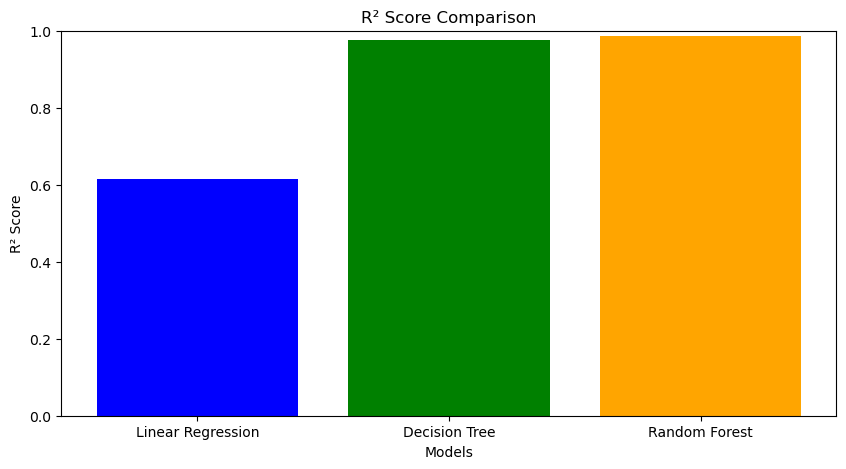

In [107]:
# Plot R² Score Comparison
plt.figure(figsize=(10, 5))
plt.bar(models, r2_scores, color=['blue', 'green', 'orange'])
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("R² Score Comparison")
plt.ylim(0, 1)  # R² score ranges from 0 to 1
plt.show()

The R² Score (also known as the coefficient of determination) indicates how well the model's predictions match the actual data. A higher R² score means the model is better at explaining the variance in the data. In this case, the Random Forest Regressor has the highest R² score of 0.9871, meaning it explains 98.71% of the variability in the power consumption, showing it's highly accurate. The Decision Tree is second, with 0.9761, and the Linear Regression has the lowest at 0.6161, meaning it explains only 61.61% of the variance in the data.

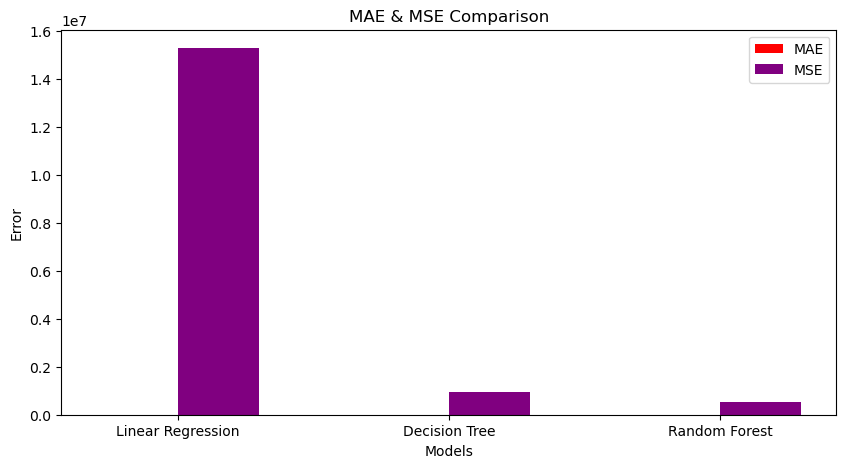

In [109]:
# Plot MAE and MSE Comparison
x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, mae_scores, width, label='MAE', color='red')
rects2 = ax.bar(x + width/2, mse_scores, width, label='MSE', color='purple')

ax.set_xlabel("Models")
ax.set_ylabel("Error")
ax.set_title("MAE & MSE Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

MAE (Mean Absolute Error) measures the average absolute difference between predicted and actual values. A lower MAE indicates better accuracy. In this case, the Random Forest model has the lowest MAE (457.62), showing it makes smaller errors in prediction. The Decision Tree has little higher MAE (582.83), and the Linear Regression model has the highest MAE (3082.79) which shows it is less accurate.

MSE (Mean Squared Error) measures the average squared difference between the predicted and actual values, giving more weight to larger errors. The Random Forest Regressor again performs best with the lowest MSE (518254.34), followed by the Decision Tree (955746.25), and finally Linear Regression with the highest MSE (15301104.14), showing it makes larger errors in prediction.

In [111]:
#HYPERPARAMETER TUNING

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


In [119]:
# Hyperparameter grid for Ridge Regression
param_grid_lr = {
    'alpha': [0.1, 1, 10, 100] 
}

# Hyperparameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 20, None], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}


In [121]:
# Ridge Regression
grid_search_lr = GridSearchCV(Ridge(), param_grid_lr, cv=5, scoring='r2', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
print("Best parameters for Ridge Regression:", grid_search_lr.best_params_)

# Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='r2', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)

# Random Forest
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)


Best parameters for Ridge Regression: {'alpha': 100}
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [123]:
# Best models from GridSearchCV
best_lr = grid_search_lr.best_estimator_
best_dt = grid_search_dt.best_estimator_
best_rf = grid_search_rf.best_estimator_

# Evaluation of models on the test set
models = {'Linear Regression': best_lr, 
          'Decision Tree': best_dt, 
          'Random Forest': best_rf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")



Linear Regression Performance:
MAE: 3082.7787
MSE: 15301085.2288
R² Score: 0.6161

Decision Tree Performance:
MAE: 577.6094
MSE: 909897.0725
R² Score: 0.9772

Random Forest Performance:
MAE: 455.9024
MSE: 512650.2998
R² Score: 0.9872


In [125]:
#Visualization of Model Preedictions

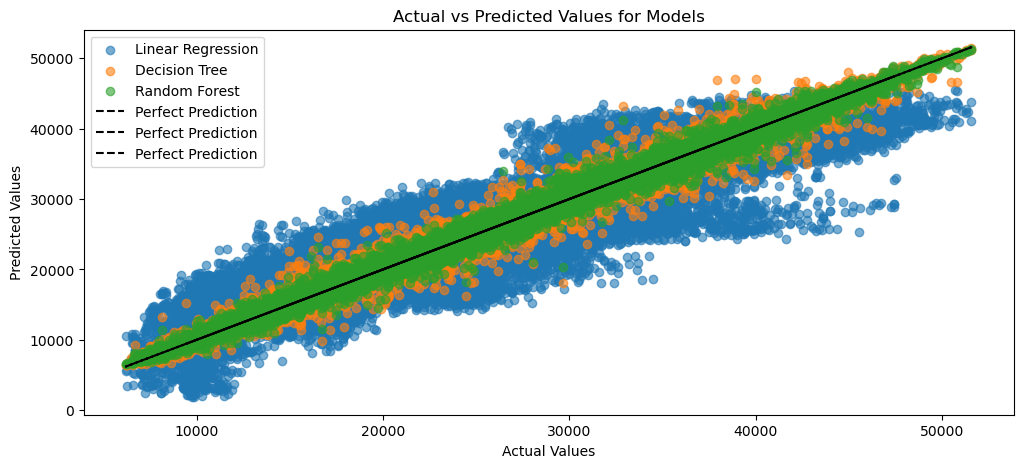

In [127]:
# Plot Actual vs Predicted Values
plt.figure(figsize=(12, 5))

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    plt.scatter(y_test, y_pred, label=name, alpha=0.6)  # Scatter plot for each model

plt.plot(y_test, y_test, color='black', linestyle='dashed', label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Models")
plt.legend()
plt.show()

This section helps us compare how well each model is predicting the values. It creates a scatter plot that shows the actual values (on the x-axis) and the predicted values (on the y-axis) for each model. The dashed black line represents perfect predictions, where the predicted values are exactly the same as the actual ones. The closer the points are to this line, the better the model. This plot allows us to see which model is doing a better job at predicting the values.

In [129]:
# Saving the Best Model

In [131]:
import joblib

# Save the best model (Assume Random Forest performed best)
best_model = best_rf  # Change this if another model performed better
joblib.dump(best_model, "best_regressor.pkl")

print("Model saved as best_regressor.pkl")


Model saved as best_regressor.pkl


In [133]:
#Using the saved model

In [141]:
print(X_train.columns)


Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'hour', 'day', 'month', 'weekday'],
      dtype='object')


In [143]:
# Creating new data
new_data_df = pd.DataFrame(new_data_dict)

# Keeping only columns that exist in X_train
new_data_df = new_data_df[[col for col in X_train.columns if col in new_data_df.columns]]


In [149]:
predicted_value = loaded_model.predict(new_data_df)
print(f"Predicted Power Consumption: {predicted_value[0][0]:.2f}")


Predicted Power Consumption: 34476.14


In [152]:
#Conclusion

For the prediction of power consumption, i developed three regression models without hyperparameter tuning first and then with tuning. Then i evaluated all models by their performance using the R2 score and MSE metrics.

As per the model training we did above we can clearly see that the Random Forest Regressor performed the best. It has R² score of 0.9871 which means it can explain nearly 99% of the variation in power consumption. Also the Decision Tree regressor model perfomed well with an R² score of 0.9761 that too showed strong prediction power whereas linear didnot perform well with just R² score of 0.6161. 

In the future, I would like to develop a deeper understanding of other supervised learning methods that will further enhance model performance. I'll explore unsupervised machine learning techniques in uncovering hidden patterns of power consumption when I'm already an expert in this field.